In [1]:
# pip install PyWavelets


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Wavelet Transform 

In [5]:
import pywt 

X = [3,7,1,1,-2,5,4,6]

CA, CD = pywt.dwt(X , 'haar')
y = pywt.idwt(CA,CD,'haar')

print(CA) #Approximation coefficients (low-frequency part)
print(CD) #Detail coefficients (high-frequency part)
print(y) 

[7.07106781 1.41421356 2.12132034 7.07106781]
[-2.82842712  0.         -4.94974747 -1.41421356]
[ 3.  7.  1.  1. -2.  5.  4.  6.]


# Multi Wavelet Transform 

In [8]:
X = [3,7,1,1,-2,5,4,6]

coeff = pywt.wavedec(X, 'db1', level = 2, mode= 'periodic')
cA2, CD2, CD1  = coeff
y = pywt.waverec(coeff, 'db1', mode= 'periodic')
print(cA2) #Approximation coefficients (low-frequency part)
print(CD2) #Detail coefficients (high-frequency part)
print(CD1)
print(y)

[6.  6.5]
[ 4.  -3.5]
[-2.82842712  0.         -4.94974747 -1.41421356]
[ 3.  7.  1.  1. -2.  5.  4.  6.]


In [10]:
# pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 41.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.2 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


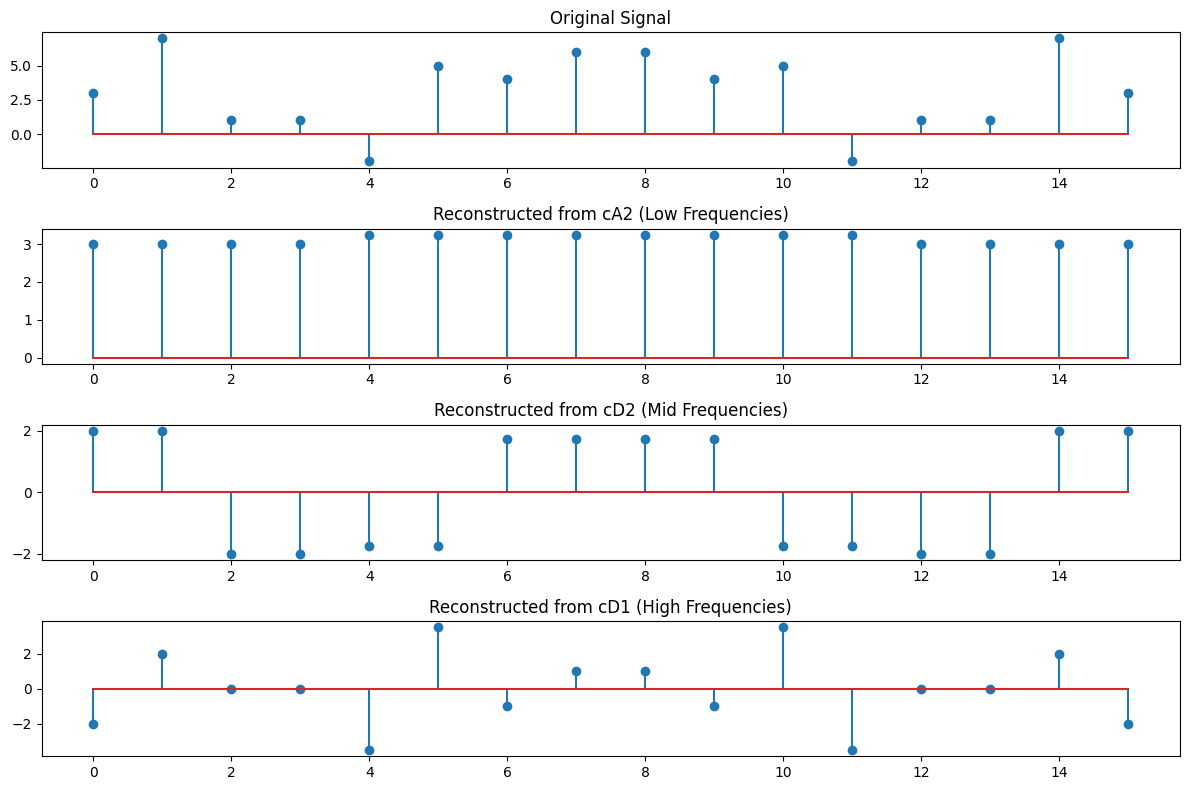

In [13]:
# Visualizing the signal, cA2, cD2, cD1 for clear intuition
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Original signal
x = [3, 7, 1, 1, -2, 5, 4, 6, 6, 4, 5, -2, 1, 1, 7, 3]

# Multi-level DWT using Haar ('db1') with level=2
coeffs = pywt.wavedec(x, 'db1', level=2, mode='periodic')
cA2, cD2, cD1 = coeffs

# Reconstruct approximation and details separately for visualization
# Note: To reconstruct individual components, set other coefficients to zero
def reconstruct_component(component_idx, coeffs, wavelet, mode):
    coeffs_copy = [np.zeros_like(c) for c in coeffs]
    coeffs_copy[component_idx] = coeffs[component_idx]
    return pywt.waverec(coeffs_copy, wavelet, mode=mode)

rec_cA2 = reconstruct_component(0, coeffs, 'db1', 'periodic')
rec_cD2 = reconstruct_component(1, coeffs, 'db1', 'periodic')
rec_cD1 = reconstruct_component(2, coeffs, 'db1', 'periodic')

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.stem(x)
plt.title('Original Signal')

plt.subplot(4, 1, 2)
plt.stem(rec_cA2)
plt.title('Reconstructed from cA2 (Low Frequencies)')

plt.subplot(4, 1, 3)
plt.stem(rec_cD2)
plt.title('Reconstructed from cD2 (Mid Frequencies)')

plt.subplot(4, 1, 4)
plt.stem(rec_cD1)
plt.title('Reconstructed from cD1 (High Frequencies)')

plt.tight_layout()
plt.show()


# Importing an Audio and Applying WaveLet Transformation 

In [14]:
# pip install numpy scipy 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 43.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
from scipy.io import wavfile 
import numpy as np
import pywt

# Read audio
samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')

# Handle stereo audio if needed
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Normalize
data = data / np.max(np.abs(data))

# Apply DWT
ca, cd = pywt.dwt(data, 'bior6.8', 'per')

# Reconstruct
y = pywt.idwt(ca, cd, 'bior6.8', 'per')

# Convert to int16 for saving
y_int = np.int16(y / np.max(np.abs(y)) * 32767)
cd_int = np.int16(cd / np.max(np.abs(cd)) * 32767)

# Write WAV files
wavfile.write('piano_reconstructed.wav', samplerate, y_int)
wavfile.write('piano_detail.wav', samplerate, cd_int)


/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_12475/327183603.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')


# Plots

🔊 Original Audio:


/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_12475/2464052260.py:10: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')


🔊 Reconstructed Audio after DWT + IDWT:


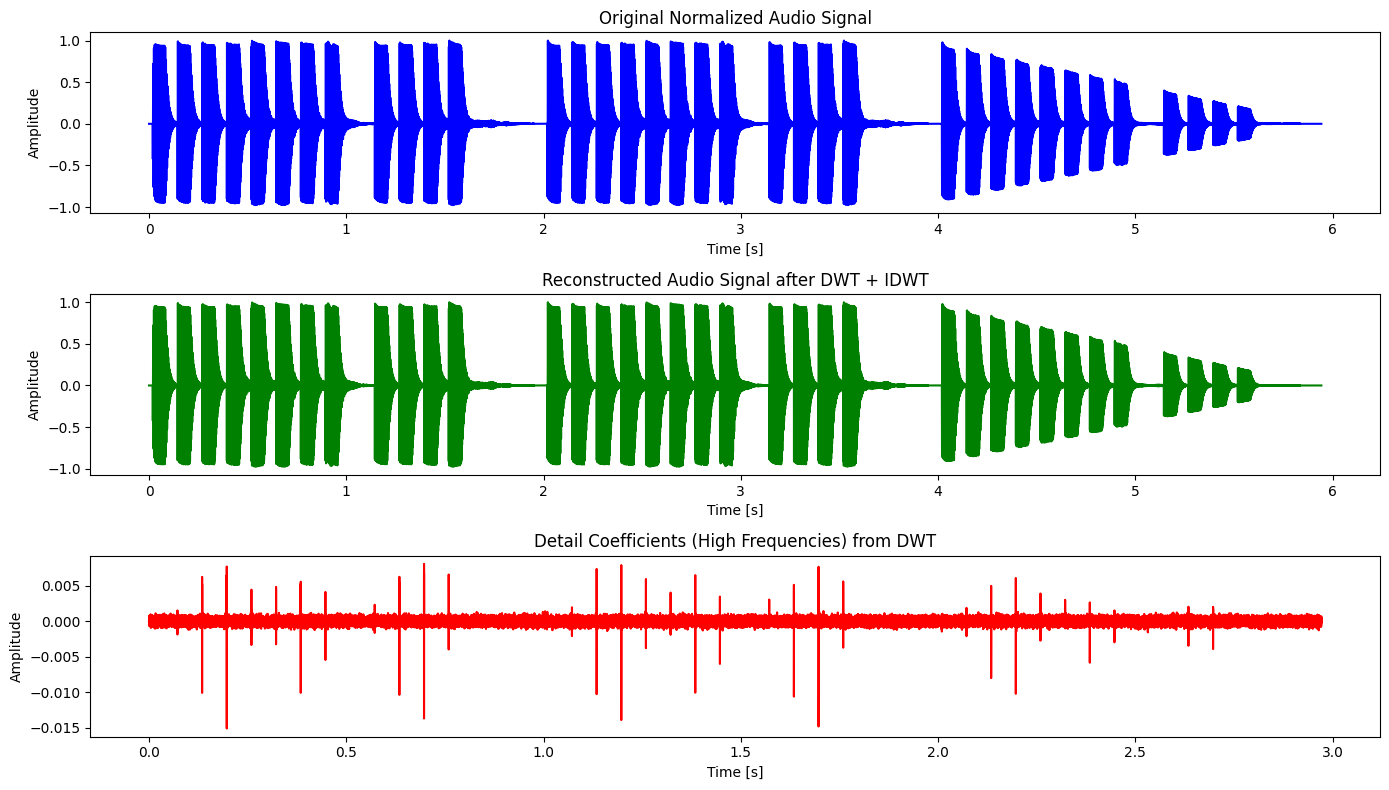

In [22]:
# ✅ Code to listen and plot before & after DWT-IDWT on your audio for clear DSP intuition

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pywt
import IPython.display as ipd

# Read audio
samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')

# Handle stereo audio if needed
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Normalize
data_norm = data / np.max(np.abs(data))

# Apply DWT
ca, cd = pywt.dwt(data_norm, 'bior6.8', 'per')

# Reconstruct
y = pywt.idwt(ca, cd, 'bior6.8', 'per')

# Rescale reconstructed signal for listening and saving
y_norm = y / np.max(np.abs(y))

# Listen to original and reconstructed signals
print("🔊 Original Audio:")
ipd.display(ipd.Audio(data_norm, rate=samplerate))

print("🔊 Reconstructed Audio after DWT + IDWT:")
ipd.display(ipd.Audio(y_norm, rate=samplerate))

# Plot original and reconstructed signals for comparison
duration = len(data_norm) / samplerate
time = np.linspace(0., duration, len(data_norm))

plt.figure(figsize=(14, 8))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(time, data_norm, color='blue')
plt.title("Original Normalized Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot reconstructed signal
time_y = np.linspace(0., len(y_norm) / samplerate, len(y_norm))
plt.subplot(3, 1, 2)
plt.plot(time_y, y_norm, color='green')
plt.title("Reconstructed Audio Signal after DWT + IDWT")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot detail coefficients (high frequencies)
time_cd = np.linspace(0., len(cd) / samplerate, len(cd))
plt.subplot(3, 1, 3)
plt.plot(time_cd, cd, color='red')
plt.title("Detail Coefficients (High Frequencies) from DWT")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()



 # Applying Multi Level Wavelet Transformation

# Applying MultiLevel Wavelet Transformation

🔊 Listening to Approximation Component (Low Frequencies)


/var/folders/6y/8rwnfv1s3855864m6xpflvj00000gn/T/ipykernel_12475/2731550581.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')


🔊 Listening to Detail Component Level 1 (High Frequencies)


🔊 Listening to Detail Component Level 2 (Mid Frequencies)


🔊 Listening to Detail Component Level 3 (Lower Mid Frequencies)


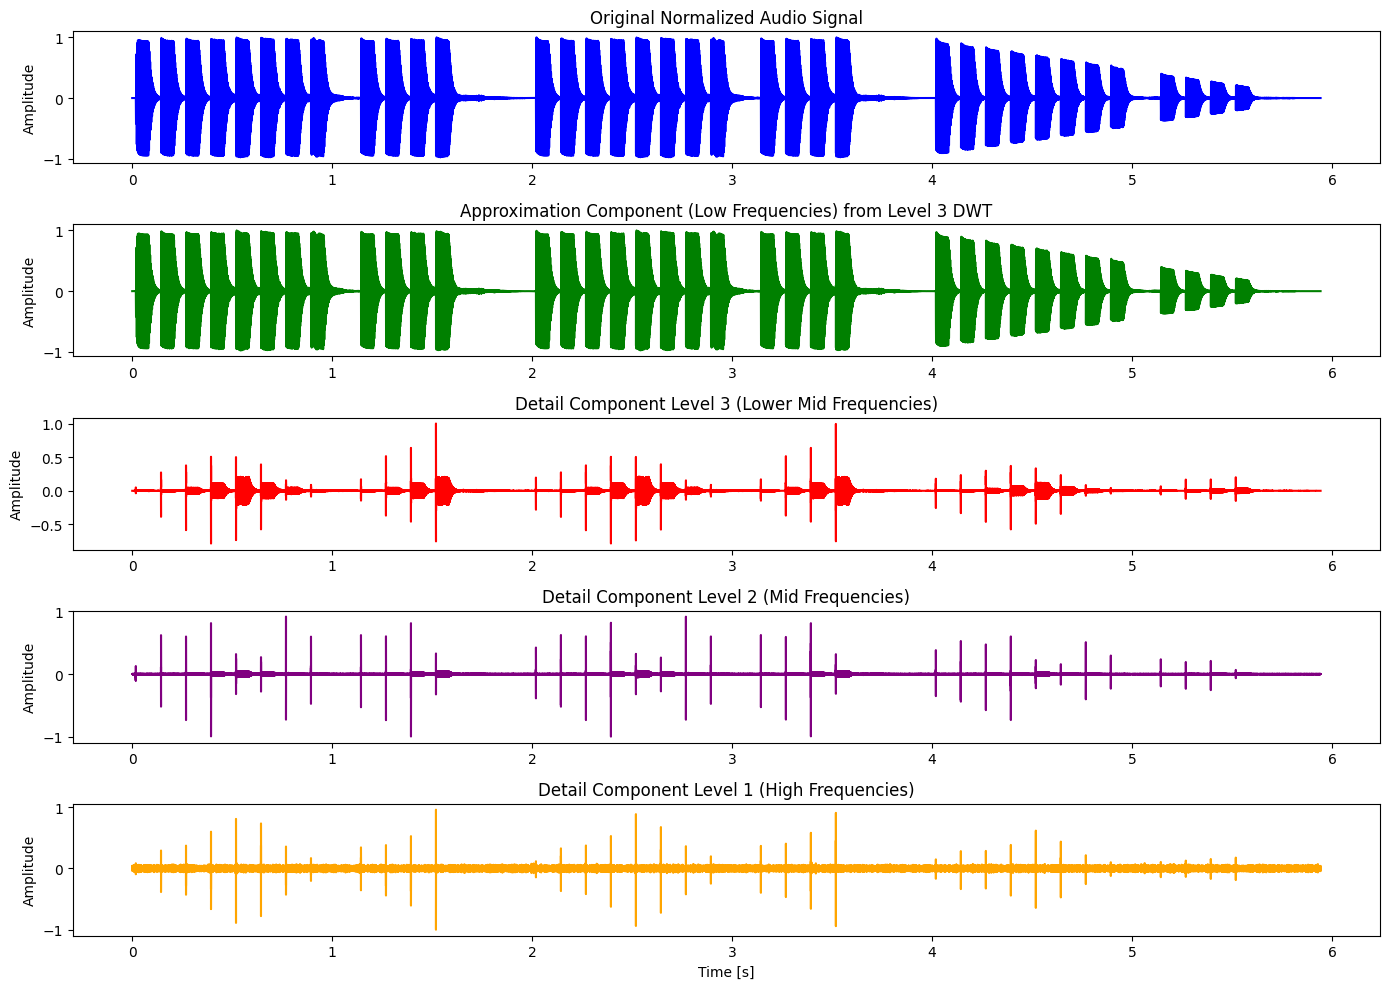

In [28]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pywt
import IPython.display as ipd

# Load and normalize audio
samplerate, data = wavfile.read('/Users/krushna/Downloads/file_example_WAV_1MG.wav')
if len(data.shape) > 1:
    data = data.mean(axis=1)
data_norm = data / np.max(np.abs(data))

# Apply 3-level DWT using wavedec
wavelet = 'db4'
level = 3
coeffs = pywt.wavedec(data_norm, wavelet, level=level)
cA3, cD3, cD2, cD1 = coeffs

# Function to reconstruct a signal using selected coefficients
def reconstruct_from_coeffs(coeffs, wavelet):
    return pywt.waverec(coeffs, wavelet)

# 1️⃣ Reconstruct approximation only (cA3)
coeffs_approx = [cA3] + [None]*level
approx_reconstructed = reconstruct_from_coeffs(coeffs_approx, wavelet)
approx_reconstructed /= np.max(np.abs(approx_reconstructed))

# 2️⃣ Reconstruct details at each level
details_reconstructed = []
for i in range(1, level + 1):
    coeffs_detail = [np.zeros_like(cA3)] + [np.zeros_like(c) for c in coeffs[1:]]
    coeffs_detail[i] = coeffs[i]
    rec = reconstruct_from_coeffs(coeffs_detail, wavelet)
    rec /= np.max(np.abs(rec)) + 1e-8
    details_reconstructed.append(rec)

# 3️⃣ Listen to components
print("🔊 Listening to Approximation Component (Low Frequencies)")
ipd.display(ipd.Audio(approx_reconstructed, rate=samplerate))

print("🔊 Listening to Detail Component Level 1 (High Frequencies)")
ipd.display(ipd.Audio(details_reconstructed[2], rate=samplerate))

print("🔊 Listening to Detail Component Level 2 (Mid Frequencies)")
ipd.display(ipd.Audio(details_reconstructed[1], rate=samplerate))

print("🔊 Listening to Detail Component Level 3 (Lower Mid Frequencies)")
ipd.display(ipd.Audio(details_reconstructed[0], rate=samplerate))

# 4️⃣ Plot waveforms
duration = len(data_norm) / samplerate
time = np.linspace(0., duration, len(data_norm))

plt.figure(figsize=(14, 10))

plt.subplot(5, 1, 1)
plt.plot(time, data_norm, color='blue')
plt.title('Original Normalized Audio Signal')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(time[:len(approx_reconstructed)], approx_reconstructed, color='green')
plt.title('Approximation Component (Low Frequencies) from Level 3 DWT')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 3)
plt.plot(time[:len(details_reconstructed[0])], details_reconstructed[0], color='red')
plt.title('Detail Component Level 3 (Lower Mid Frequencies)')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 4)
plt.plot(time[:len(details_reconstructed[1])], details_reconstructed[1], color='purple')
plt.title('Detail Component Level 2 (Mid Frequencies)')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
plt.plot(time[:len(details_reconstructed[2])], details_reconstructed[2], color='orange')
plt.title('Detail Component Level 1 (High Frequencies)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
